### **Introduction**

The aim of this task is to develop a machine learning model that can accurately predict individual healthcare costs based on demographic and lifestyle attributes available in a health insurance dataset. Accurately forecasting medical charges enables insurance providers to tailor services, optimize pricing strategies, and support customers in financial planning. 

Using a combination of data preprocessing, exploratory analysis, and predictive modeling, we employ a Random Forest Regressor to estimate healthcare expenditures. We further refine the model using hyperparameter tuning with GridSearchCV to improve generalization and reduce prediction errors. This analysis forms the foundation for strategic insights into cost drivers and enables real-time, data-informed decision-making.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 1. Load and Clean Dataset
df = pd.read_csv("C:\Users\emeka\Downloads\healthcare-cost-prediction\data.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


**Initial observations:**
1. Charges column issue: The charges field is of type `object` because some values contain currency symbols ($) or inconsistent formatting.
2. Rows: 1338
3. Data types: (a)age, bmi, children => numeric (b) sex, smoker, region are categorical. (c) Charges need to be cleaned and converted to `float`

In [5]:
# Clean 'charges' column (remove $ and convert to float)
df['charges'] = df['charges'].replace(r'[\$,]', '', regex=True).astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,Southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [7]:
# Standardize region names to lowercase for consistency
df['region'] = df['region'].str.lower()

# Define gender constants and mapping dictionary
FEMALE = 'female'
MALE = 'male'
gender_mapping = {
    'F': FEMALE,
    'woman': FEMALE,
    'M': MALE,
    'man': MALE
}

# Standardize gender values using mapping
df['sex'] = df['sex'].replace(gender_mapping)

# Convert smoker to boolean (True/False)
df['smoker'] = df['smoker'].eq('yes')  # More readable than ==

# Apply absolute value only to numeric columns
def process_column(column):
    if np.issubdtype(column.dtype, np.number):
        return column.abs()
    return column

df_final = df.apply(process_column)

# Preview random 15 rows
df_final.sample(n=15)

,age,sex,bmi,children,smoker,region,charges
1073,54.0,female,28.880,2.0,False,northeast,12096.65120
369,18.0,male,30.400,3.0,False,northeast,3481.86800
926,19.0,female,23.400,2.0,False,southwest,2913.56900
1248,18.0,female,39.820,0.0,False,southeast,1633.96180
205,28.0,female,28.880,1.0,False,northeast,4337.73520
596,42.0,female,29.480,2.0,False,southeast,7640.30920
373,26.0,male,32.900,2.0,True,southwest,36085.21900
698,56.0,male,33.725,0.0,False,northwest,10976.24575
738,23.0,male,31.730,3.0,True,northeast,36189.10170
606,27.0,female,25.175,0.0,False,northeast,3558.62025


In [8]:
# 2. Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [9]:
# 3. Define Features and Target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [10]:
# 4. Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# 5. Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 6. Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# 7. Make Predictions
y_pred = model.predict(X_test_scaled)

In [14]:
# 8. Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): $2858.87
Root Mean Squared Error (RMSE): $4879.91
R² Score: 0.8241


**Summary:**

 1. Mean Absolute Error (MAE): On average, the model’s predictions are off by about USD 2,859 from the actual healthcare charges. 
Implication: This is relatively reasonable given that healthcare charges can range from a few hundred to tens of thousands of dollars.
The model makes reasonably accurate predictions at an individual level, though individual errors of around $2,800 may still be significant in real-life decisions.

2. Root Mean Squared Error (RMSE): USD 4879.91
RMSE penalizes larger errors more heavily than MAE and reflects the typical size of a prediction error.
Implication: While most predictions are fairly accurate, there are some instances with larger deviations (i.e., outliers).
The spread in errors is moderate. One may want to further investigate high-cost outliers (e.g., smokers, chronic conditions) that the model struggles to predict precisely.

3. R² Score: 0.8241
The model explains about 82.41% of the variance in healthcare charges.
Implication: This is a strong result for a regression task on real-world insurance data.
The model captures most of the important relationships in the data, especially the effects of smoking, BMI, and age, but there’s still about 17.6% variance unaccounted for — potentially due to unmeasured factors like comorbidities or plan coverage.

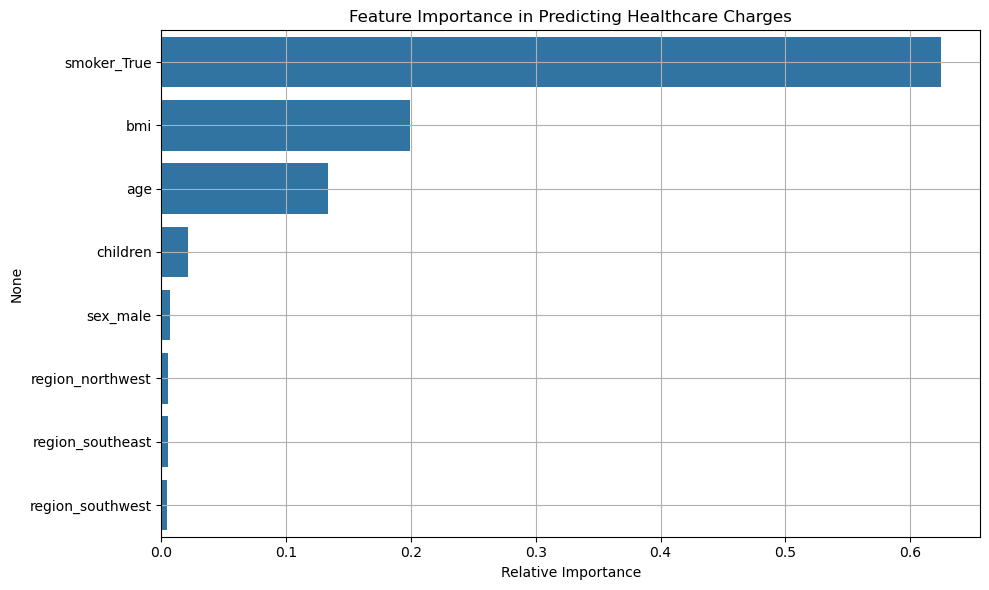

In [15]:
# 9. Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importance in Predicting Healthcare Charges")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.grid(True)
plt.show()

**Comment:**
This performance is sufficient for executive-level reporting and trend analysis, though for high-stakes applications like individual premium calculations, one might want to:

* Include more features (e.g., medical history),
* Use ensemble techniques or hyperparameter tuning,
* Deploy uncertainty quantification (prediction intervals).

Let's go for `hyperparameter` tuning with `GridSearchCV`

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
#grid_search.best_params_, -grid_search.best_score_**0.5   # RMSE from negative MSE

# Show best parameters and RMSE
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
rmse = np.sqrt(-grid_search.best_score_) # RMSE from negative MSE

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated RMSE: ${rmse:,.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validated RMSE: $4,800.08


**Findings:**
* Slight improvement: RMSE decreased by about $80. 
* This indicates that the tuned model generalizes slightly better.

**Conclusions:**
1) The tuning validated that the initial model was already well-set.
2) The selected parameters favor a balanced model: not too deep, more regularized.
3) GridSearchCV serves as a confirmation tool that the model's performance is stable and optimal within a reasonable hyperparameter space.